In [45]:
import matplotlib.pyplot as plt
from dataclasses import dataclass, Field
from typing import List
from math import log10, pow
import numpy as np

In [46]:
class Benchmark:
    def __init__(self, path_to_benchmark: str, first_line: int, last_line: int):
        self.N = []
        self.time_host2device = []
        self.compute_time = []
        self.time_device2host = []
        self.mecps = []
        self.bw = []
        self.gflops = []
        
        with open(path_to_benchmark, 'r') as f:
            self.lines = f.readlines()
        
        for index in range(first_line-1, last_line):
            line = self.lines[index]
            word = line.split(';')
            self.N.append(int(word[1]))
            self.time_host2device.append(float(word[3]))
            self.compute_time.append(float(word[5]))
            self.time_device2host.append(float(word[7]))
            self.mecps.append(float(word[9]))
            self.gflops.append(float(word[11]))
            self.bw.append(float(word[13]))

In [47]:
cpu_float_left = Benchmark('cpu_left_float2.log', 1, 20)
cpu_float_right = Benchmark('cpu_right_float2.log', 1, 20)
cpu_double_left = Benchmark('cpu_left_double2.log', 1, 20)
cpu_double_right = Benchmark('cpu_right_double2.log', 1, 20)

gpu_float_left = Benchmark('cuda_left_float2.log', 1, 20)
gpu_float_right = Benchmark('cuda_right_float2.log', 1, 20)
gpu_double_left = Benchmark('cuda_left_double2.log', 1, 20)
gpu_double_right = Benchmark('cuda_right_double2.log', 1, 20)

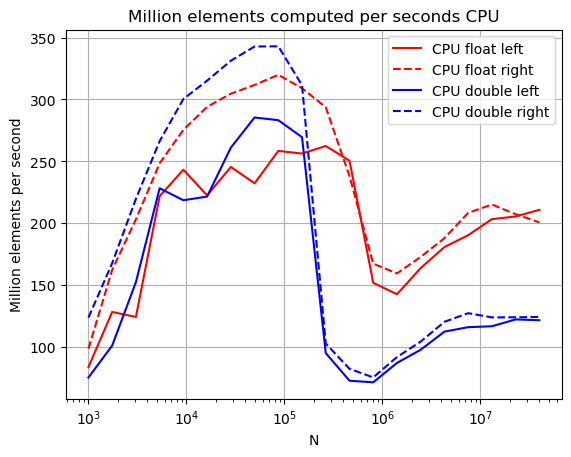

In [48]:
fig, ax = plt.subplots()
ax.plot(cpu_float_left.N, cpu_float_left.mecps, 'r', label='CPU float left')
ax.plot(cpu_float_right.N, cpu_float_right.mecps, 'r--', label='CPU float right')
ax.plot(cpu_double_left.N, cpu_double_left.mecps, 'b', label='CPU double left')
ax.plot(cpu_double_right.N, cpu_double_right.mecps, 'b--', label='CPU double right')

ax.set(xlabel='N', ylabel='Million elements per second', xscale='log', title='Million elements computed per seconds CPU')
ax.grid()
ax.legend()
plt.show()

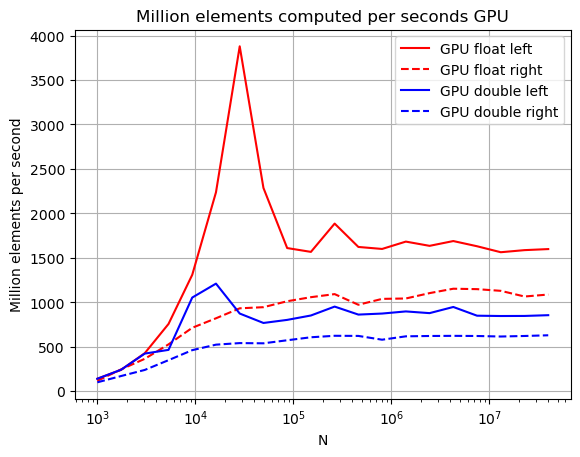

In [49]:
fig, ax = plt.subplots()
ax.plot(gpu_float_left.N, gpu_float_left.mecps, 'r', label='GPU float left')
ax.plot(gpu_float_right.N, gpu_float_right.mecps, 'r--', label='GPU float right')
ax.plot(gpu_double_left.N, gpu_double_left.mecps, 'b', label='GPU double left')
ax.plot(gpu_double_right.N, gpu_double_right.mecps, 'b--', label='GPU double right')

ax.set(xlabel='N', ylabel='Million elements per second', xscale='log', title='Million elements computed per seconds GPU')
ax.grid()
ax.legend()
plt.show()

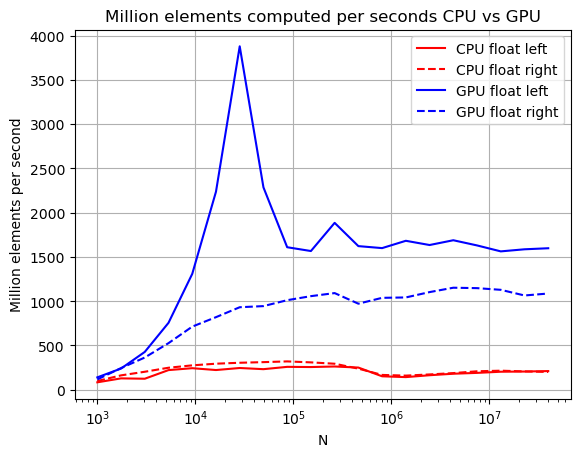

In [62]:
fig, ax = plt.subplots()
ax.plot(cpu_float_left.N, cpu_float_left.mecps, 'r', label='CPU float left')
ax.plot(cpu_float_right.N, cpu_float_right.mecps, 'r--', label='CPU float right')

ax.plot(gpu_float_left.N, gpu_float_left.mecps, 'b', label='GPU float left')
ax.plot(gpu_float_right.N, gpu_float_right.mecps, 'b--', label='GPU float right')

ax.set(xlabel='N', ylabel='Million elements per second', xscale='log', title='Million elements computed per seconds CPU vs GPU')
ax.grid()
ax.legend()
plt.show()

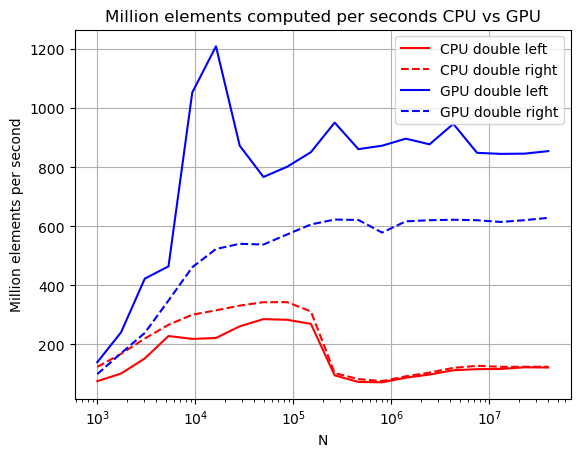

In [51]:
fig, ax = plt.subplots()
ax.plot(cpu_double_left.N, cpu_double_left.mecps, 'r', label='CPU double left')
ax.plot(cpu_double_right.N, cpu_double_right.mecps, 'r--', label='CPU double right')

ax.plot(gpu_double_left.N, gpu_double_left.mecps, 'b', label='GPU double left')
ax.plot(gpu_double_right.N, gpu_double_right.mecps, 'b--', label='GPU double right')

ax.set(xlabel='N', ylabel='Million elements per second', xscale='log', title='Million elements computed per seconds CPU vs GPU')
ax.grid()
ax.legend()
plt.show()

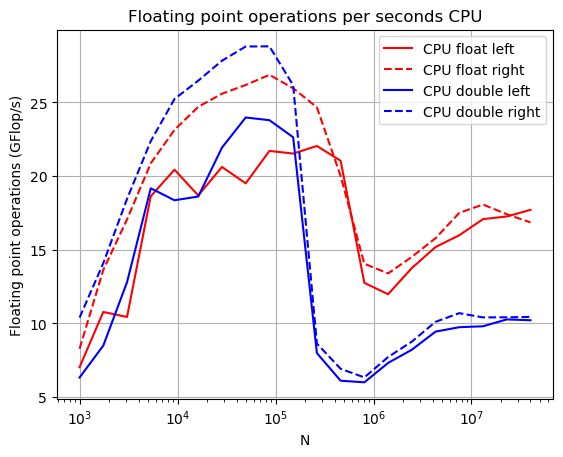

In [52]:
fig, ax = plt.subplots()
ax.plot(cpu_float_left.N, cpu_float_left.gflops, 'r', label='CPU float left')
ax.plot(cpu_float_right.N, cpu_float_right.gflops, 'r--', label='CPU float right')
ax.plot(cpu_double_left.N, cpu_double_left.gflops, 'b', label='CPU double left')
ax.plot(cpu_double_right.N, cpu_double_right.gflops, 'b--', label='CPU double right')

ax.set(xlabel='N', ylabel='Floating point operations (GFlop/s)', xscale='log', title='Floating point operations per seconds CPU')
ax.grid()
ax.legend()
plt.show()

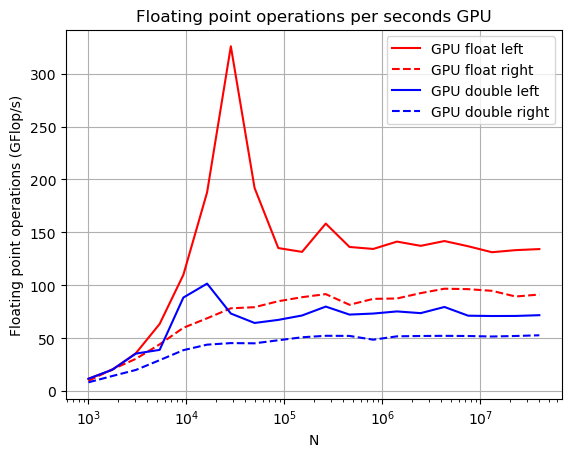

In [53]:
fig, ax = plt.subplots()
ax.plot(gpu_float_left.N, gpu_float_left.gflops, 'r', label='GPU float left')
ax.plot(gpu_float_right.N, gpu_float_right.gflops, 'r--', label='GPU float right')
ax.plot(gpu_double_left.N, gpu_double_left.gflops, 'b', label='GPU double left')
ax.plot(gpu_double_right.N, gpu_double_right.gflops, 'b--', label='GPU double right')   

ax.set(xlabel='N', ylabel='Floating point operations (GFlop/s)', xscale='log', title='Floating point operations per seconds GPU')
ax.grid()
ax.legend() 
plt.show()

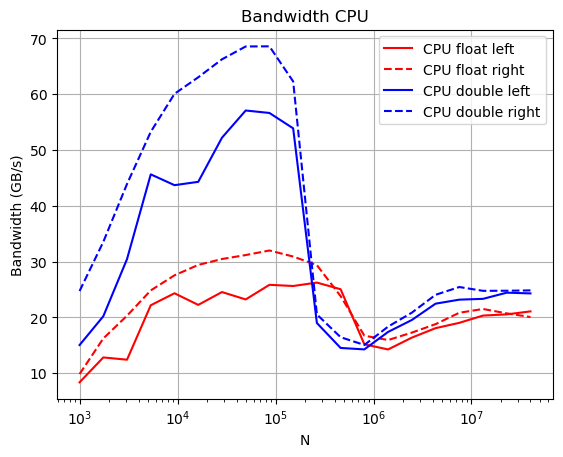

In [54]:
fig, ax = plt.subplots()
ax.plot(cpu_float_left.N, cpu_float_left.bw, 'r', label='CPU float left')
ax.plot(cpu_float_right.N, cpu_float_right.bw, 'r--', label='CPU float right')
ax.plot(cpu_double_left.N, cpu_double_left.bw, 'b', label='CPU double left')
ax.plot(cpu_double_right.N, cpu_double_right.bw, 'b--', label='CPU double right')

ax.set(xlabel='N', ylabel='Bandwidth (GB/s)', xscale='log', title='Bandwidth CPU')
ax.grid()
ax.legend()
plt.show()

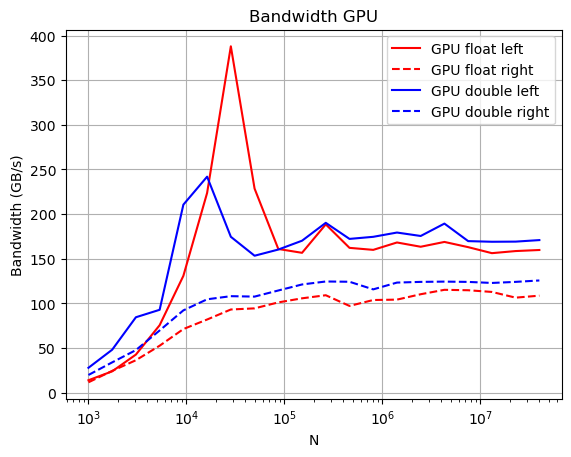

In [55]:
fig, ax = plt.subplots()    
ax.plot(gpu_float_left.N, gpu_float_left.bw, 'r', label='GPU float left')
ax.plot(gpu_float_right.N, gpu_float_right.bw, 'r--', label='GPU float right')
ax.plot(gpu_double_left.N, gpu_double_left.bw, 'b', label='GPU double left')
ax.plot(gpu_double_right.N, gpu_double_right.bw, 'b--', label='GPU double right')

ax.set(xlabel='N', ylabel='Bandwidth (GB/s)', xscale='log', title='Bandwidth GPU')
ax.grid()
ax.legend()
plt.show()

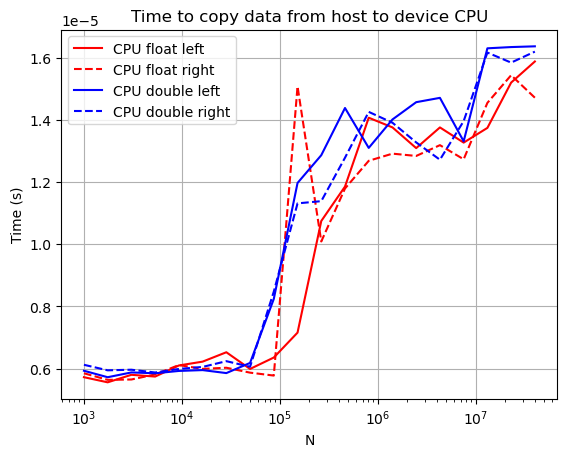

In [56]:
fig, ax = plt.subplots()
ax.plot(cpu_float_left.N, cpu_float_left.time_host2device, 'r', label='CPU float left')
ax.plot(cpu_float_right.N, cpu_float_right.time_host2device, 'r--', label='CPU float right')
ax.plot(cpu_double_left.N, cpu_double_left.time_host2device, 'b', label='CPU double left')
ax.plot(cpu_double_right.N, cpu_double_right.time_host2device, 'b--', label='CPU double right')

ax.set(xlabel='N', ylabel='Time (s)', xscale='log', title='Time to copy data from host to device CPU')
ax.grid()
ax.legend()
plt.show()

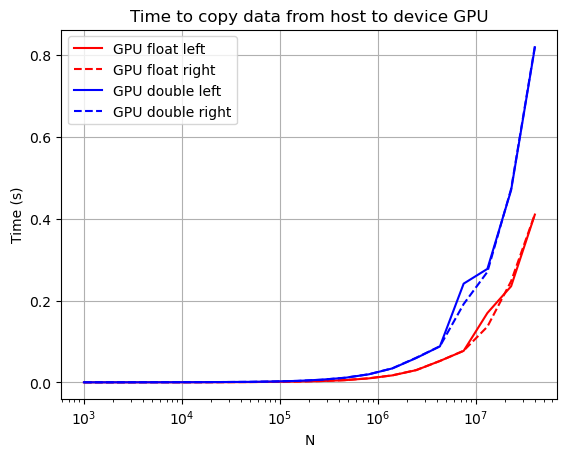

In [57]:
fig, ax = plt.subplots()
ax.plot(gpu_float_left.N, gpu_float_left.time_host2device, 'r', label='GPU float left')
ax.plot(gpu_float_right.N, gpu_float_right.time_host2device, 'r--', label='GPU float right')
ax.plot(gpu_double_left.N, gpu_double_left.time_host2device, 'b', label='GPU double left')  
ax.plot(gpu_double_right.N, gpu_double_right.time_host2device, 'b--', label='GPU double right')

ax.set(xlabel='N', ylabel='Time (s)', xscale='log', title='Time to copy data from host to device GPU')
ax.grid()
ax.legend()
plt.show()


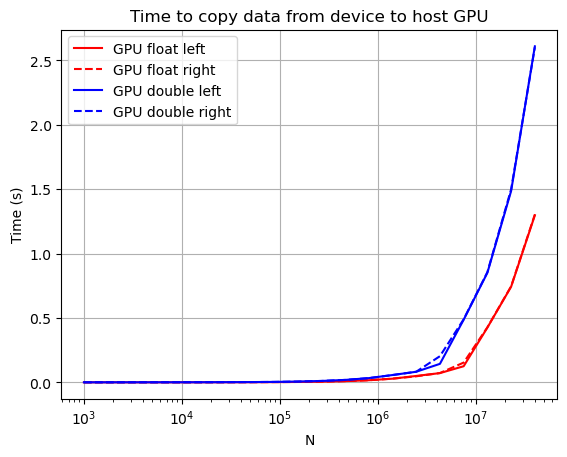

In [58]:
fig, ax = plt.subplots()
ax.plot(gpu_float_left.N, gpu_float_left.time_device2host, 'r', label='GPU float left')
ax.plot(gpu_float_right.N, gpu_float_right.time_device2host, 'r--', label='GPU float right')
ax.plot(gpu_double_left.N, gpu_double_left.time_device2host, 'b', label='GPU double left')
ax.plot(gpu_double_right.N, gpu_double_right.time_device2host, 'b--', label='GPU double right')

ax.set(xlabel='N', ylabel='Time (s)', xscale='log', title='Time to copy data from device to host GPU')
ax.grid()
ax.legend()
plt.show()

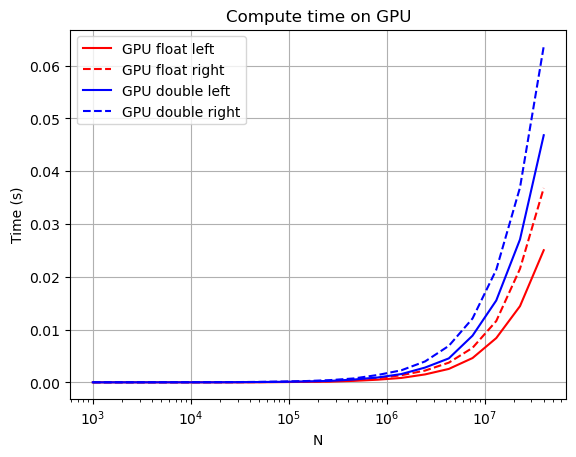

In [59]:
fig, ax = plt.subplots()
ax.plot(gpu_float_left.N, gpu_float_left.compute_time, 'r', label='GPU float left')
ax.plot(gpu_float_right.N, gpu_float_right.compute_time, 'r--', label='GPU float right')
ax.plot(gpu_double_left.N, gpu_double_left.compute_time, 'b', label='GPU double left')
ax.plot(gpu_double_right.N, gpu_double_right.compute_time, 'b--', label='GPU double right')

ax.set(xlabel='N', ylabel='Time (s)', xscale='log', title='Compute time on GPU')
ax.grid()
ax.legend()
plt.show()

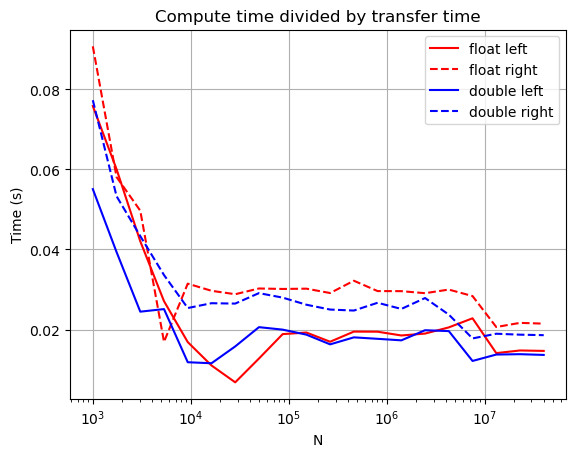

In [60]:
fig, ax = plt.subplots()

total_transfer_time_float_left = np.array(gpu_float_left.time_host2device) + np.array(gpu_float_left.time_device2host)
total_transfer_time_float_right = np.array(gpu_float_right.time_host2device) + np.array(gpu_float_right.time_device2host)
total_transfer_time_double_left = np.array(gpu_double_left.time_host2device) + np.array(gpu_double_left.time_device2host)
total_transfer_time_double_right = np.array(gpu_double_right.time_host2device) + np.array(gpu_double_right.time_device2host)

compute_divided_by_transfer_float_left = np.array(gpu_float_left.compute_time) / total_transfer_time_float_left
compute_divided_by_transfer_float_right = np.array(gpu_float_right.compute_time) / total_transfer_time_float_right
compute_divided_by_transfer_double_left = np.array(gpu_double_left.compute_time) / total_transfer_time_double_left  
compute_divided_by_transfer_double_right = np.array(gpu_double_right.compute_time) / total_transfer_time_double_right

ax.plot(gpu_float_left.N, compute_divided_by_transfer_float_left, 'r', label='float left')
ax.plot(gpu_float_right.N, compute_divided_by_transfer_float_right, 'r--', label='float right')
ax.plot(gpu_double_left.N, compute_divided_by_transfer_double_left, 'b', label='double left')
ax.plot(gpu_double_right.N, compute_divided_by_transfer_double_right, 'b--', label='double right')

ax.set(xlabel='N', ylabel='Time (s)', xscale='log', title='Compute time divided by transfer time')
ax.grid()
ax.legend()
plt.show()

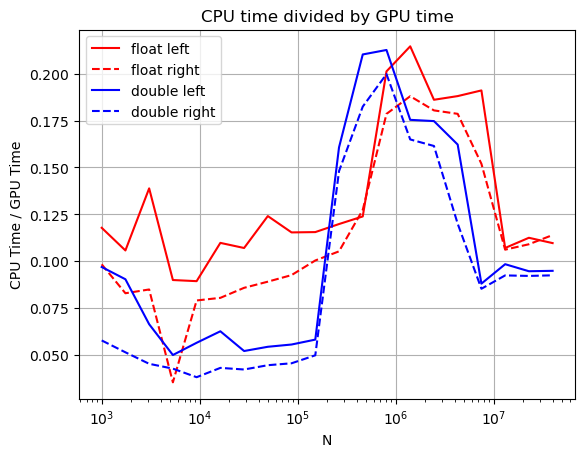

In [61]:
fig, ax = plt.subplots()

total_time_float_left = np.array(gpu_float_left.time_host2device) + np.array(gpu_float_left.time_device2host) + np.array(gpu_float_left.compute_time)
total_time_float_right = np.array(gpu_float_right.time_host2device) + np.array(gpu_float_right.time_device2host) + np.array(gpu_float_right.compute_time)
total_time_double_left = np.array(gpu_double_left.time_host2device) + np.array(gpu_double_left.time_device2host) + np.array(gpu_double_left.compute_time)
total_time_double_right = np.array(gpu_double_right.time_host2device) + np.array(gpu_double_right.time_device2host) + np.array(gpu_double_right.compute_time)

cpu_gpu_time_float_left = np.divide(np.array(cpu_float_left.compute_time), total_time_float_left)
cpu_gpu_time_float_right = np.divide(np.array(cpu_float_right.compute_time), total_time_float_right)    
cpu_gpu_time_double_left = np.divide(np.array(cpu_double_left.compute_time), total_time_double_left)
cpu_gpu_time_double_right = np.divide(np.array(cpu_double_right.compute_time), total_time_double_right)

ax.plot(gpu_float_left.N, cpu_gpu_time_float_left, 'r', label='float left')
ax.plot(gpu_float_right.N, cpu_gpu_time_float_right, 'r--', label='float right')
ax.plot(gpu_double_left.N, cpu_gpu_time_double_left, 'b', label='double left')
ax.plot(gpu_double_right.N, cpu_gpu_time_double_right, 'b--', label='double right')

ax.set(xlabel='N', ylabel='CPU Time / GPU Time', xscale='log', title='CPU time divided by GPU time')
ax.grid()
ax.legend() 
plt.show()